# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [121]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [122]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [123]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city.replace(' ', '+')}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp_F = city_weather["main"]["temp_max"]
        city_max_temp_C = round((city_max_temp_F - 32) * 5/9,2)
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp_C,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaqortoq
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | mek'ele
Processing Record 6 of Set 1 | long beach
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | peace river
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | vila velha
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | highland park
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | atafu village
Processing Record 16 of Set 1 | ares
Processing Record 17 of Set 1 | san antonio de pale
Processing Record 18 of Set 1 | asau village
City not found. Skipping...
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | gornyye klyuchi
Processing 

Processing Record 36 of Set 4 | sisimiut
Processing Record 37 of Set 4 | phan rang-thap cham
Processing Record 38 of Set 4 | villa el carmen
Processing Record 39 of Set 4 | kiunga
Processing Record 40 of Set 4 | hithadhoo
Processing Record 41 of Set 4 | kuchaiburi
Processing Record 42 of Set 4 | lihue
Processing Record 43 of Set 4 | ancud
Processing Record 44 of Set 4 | papao
Processing Record 45 of Set 4 | souillac
Processing Record 46 of Set 4 | ijuw
City not found. Skipping...
Processing Record 47 of Set 4 | karratha
Processing Record 48 of Set 4 | great falls
Processing Record 49 of Set 4 | ilulissat
Processing Record 0 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 1 of Set 5 | malango
Processing Record 2 of Set 5 | thunder bay
Processing Record 3 of Set 5 | seydi
Processing Record 4 of Set 5 | kodiak
Processing Record 5 of Set 5 | zheleznodorozhnyy
Processing Record 6 of Set 5 | san martin
Processing Record 7 of Set 5 | fale old settlement
Processing Record 8 

Processing Record 27 of Set 8 | omdurman
Processing Record 28 of Set 8 | port blair
Processing Record 29 of Set 8 | hinigaran
Processing Record 30 of Set 8 | port alfred
Processing Record 31 of Set 8 | 'ibri
City not found. Skipping...
Processing Record 32 of Set 8 | gidam
Processing Record 33 of Set 8 | blagoveshchensk
Processing Record 34 of Set 8 | praia
Processing Record 35 of Set 8 | timimoun
Processing Record 36 of Set 8 | aripuana
Processing Record 37 of Set 8 | saint-denis
Processing Record 38 of Set 8 | sassandra
Processing Record 39 of Set 8 | motueka
Processing Record 40 of Set 8 | merritt
Processing Record 41 of Set 8 | salalah
Processing Record 42 of Set 8 | prince rupert
Processing Record 43 of Set 8 | genhe
Processing Record 44 of Set 8 | dawei
Processing Record 45 of Set 8 | remire-montjoly
Processing Record 46 of Set 8 | mangalore
Processing Record 47 of Set 8 | kayangel
Processing Record 48 of Set 8 | giyani
Processing Record 49 of Set 8 | as sulayyil
Processing Recor

Processing Record 17 of Set 12 | yaren
Processing Record 18 of Set 12 | saynshand
Processing Record 19 of Set 12 | birobidzhan
Processing Record 20 of Set 12 | banda aceh
Processing Record 21 of Set 12 | ulaangom
Processing Record 22 of Set 12 | jasper
Processing Record 23 of Set 12 | yuksekova
Processing Record 24 of Set 12 | luzino
Processing Record 25 of Set 12 | tucupita
Processing Record 26 of Set 12 | yermentau
Processing Record 27 of Set 12 | berdigestyakh
Processing Record 28 of Set 12 | santa elena de uairen
Processing Record 29 of Set 12 | puma
Processing Record 30 of Set 12 | novodvinsk
Processing Record 31 of Set 12 | witbank
Processing Record 32 of Set 12 | chabahar
Processing Record 33 of Set 12 | maasim
Processing Record 34 of Set 12 | alotau
City not found. Skipping...
Processing Record 35 of Set 12 | colonel hill
Processing Record 36 of Set 12 | gueltat zemmour
City not found. Skipping...
Processing Record 37 of Set 12 | xilin hot
Processing Record 38 of Set 12 | enriq

In [124]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [125]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaqortoq,60.7167,-46.0333,4.77,69,100,4.50,GL,1694652266
1,papatowai,-46.5619,169.4708,12.03,75,43,19.22,NZ,1694652272
2,bredasdorp,-34.5322,20.0403,10.65,73,100,10.74,ZA,1694652273
3,mek'ele,13.4967,39.4753,15.80,80,97,2.37,ET,1694652198
4,long beach,33.7670,-118.1892,27.75,73,0,9.22,US,1694652273


In [126]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [127]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,4.77,69,100,4.50,GL,1694652266
1,papatowai,-46.5619,169.4708,12.03,75,43,19.22,NZ,1694652272
2,bredasdorp,-34.5322,20.0403,10.65,73,100,10.74,ZA,1694652273
3,mek'ele,13.4967,39.4753,15.80,80,97,2.37,ET,1694652198
4,long beach,33.7670,-118.1892,27.75,73,0,9.22,US,1694652273


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

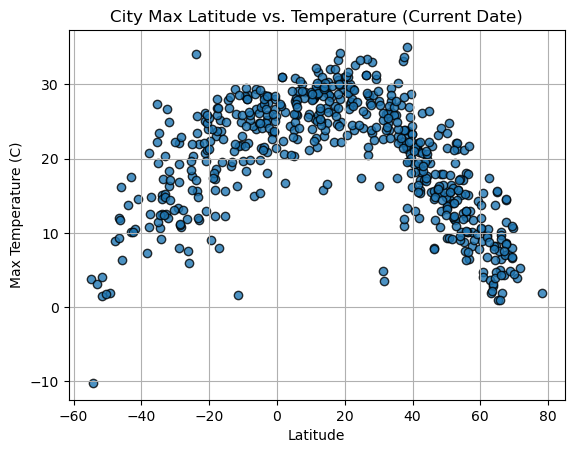

In [128]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", marker="o",alpha =0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

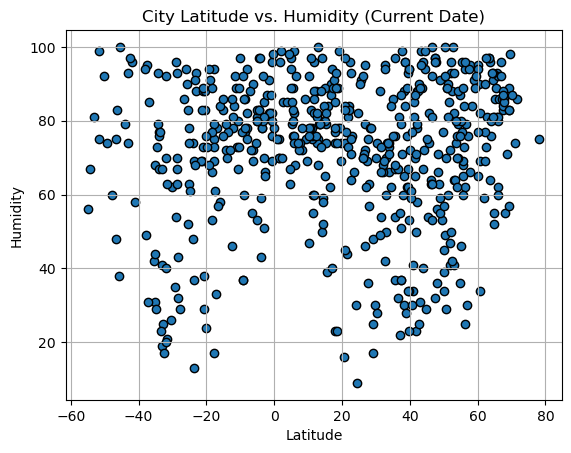

In [129]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

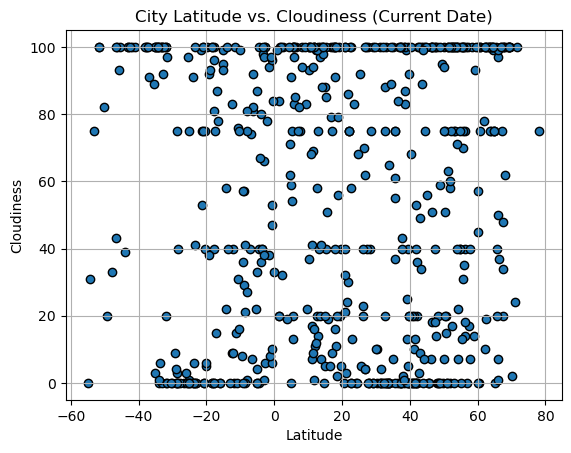

In [130]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

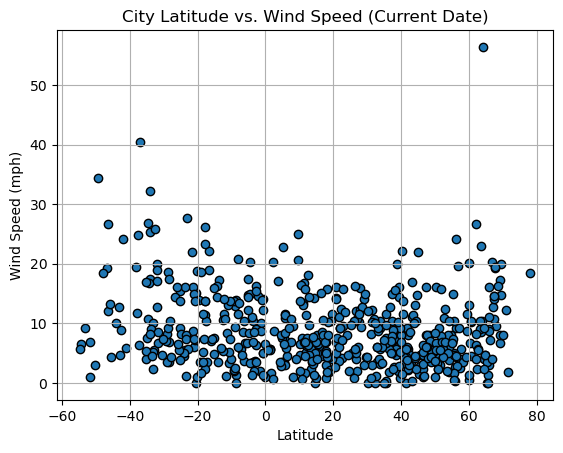

In [131]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [132]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, Yname, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.xlabel("Latitude")
    plt.ylabel(Yname)
    print(f"The r-Value is: {r_value}")

In [133]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,4.77,69,100,4.50,GL,1694652266
3,mek'ele,13.4967,39.4753,15.80,80,97,2.37,ET,1694652198
4,long beach,33.7670,-118.1892,27.75,73,0,9.22,US,1694652273
5,talnakh,69.4865,88.3972,10.67,98,100,14.72,RU,1694652273
7,peace river,56.2501,-117.2860,15.17,62,75,9.22,CA,1694652273


In [134]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,papatowai,-46.5619,169.4708,12.03,75,43,19.22,NZ,1694652272
2,bredasdorp,-34.5322,20.0403,10.65,73,100,10.74,ZA,1694652273
6,port-aux-francais,-49.3500,70.2167,1.91,74,20,34.36,TF,1694652273
8,grytviken,-54.2811,-36.5092,-10.21,67,31,6.58,GS,1694652273
9,vila velha,-20.3297,-40.2925,23.97,83,75,15.01,BR,1694652185


###  Temperature vs. Latitude Linear Regression Plot

The r-Value is: -0.8094225003960824


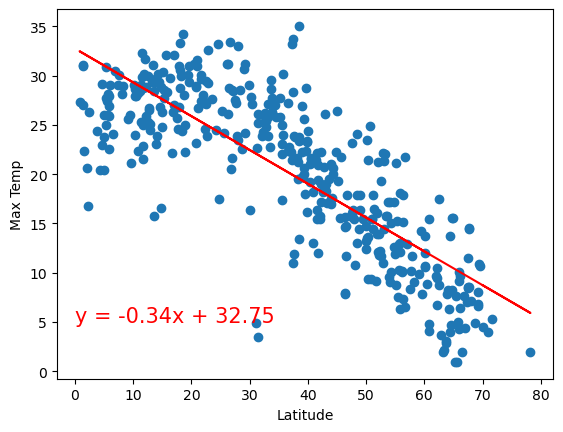

In [135]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp" ,(0, 5))

The r-Value is: 0.7082618244866101


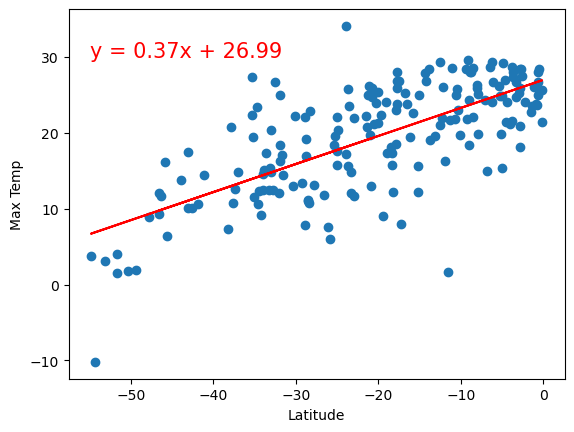

In [136]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp", (-55, 30))

**Discussion about the linear relationship:** 
In the context of linear regression in the Northern Hemisphere, it indicates a negative relationship, implying that as latitude increases, the temperature tends to decrease. Conversely, in the Southern Hemisphere, the linear regression demonstrates a positive correlation, suggesting that temperature tends to rise as latitude increases.

### Humidity vs. Latitude Linear Regression Plot

The r-Value is: 0.003475198177778952


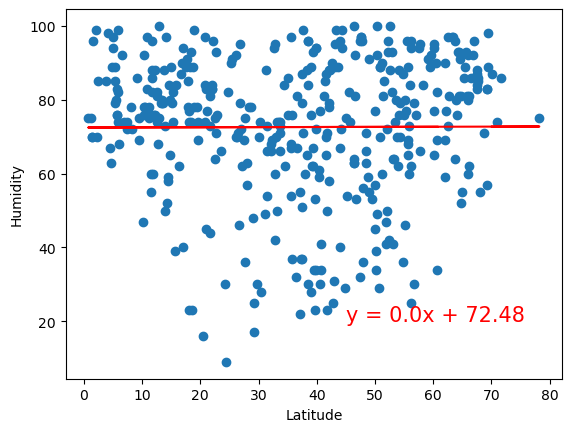

In [137]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (45, 20))

The r-Value is: 0.21355164600548016


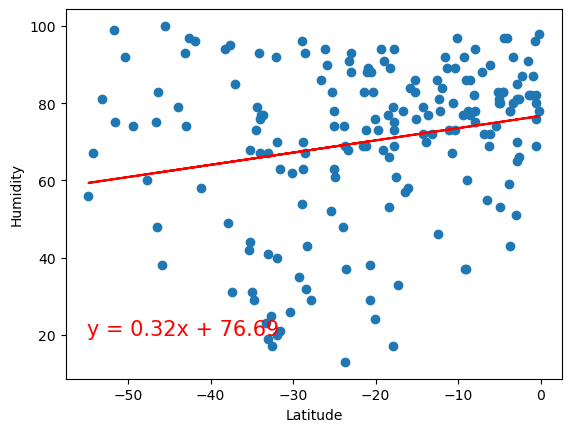

In [138]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (-55, 20))

**Discussion about the linear relationship:** 
In summary, the linear regression line for the Northern Hemisphere displays a positive correlation, while the Southern Hemisphere's linear regression line exhibits a negative correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-Value is: 0.03360661982627084


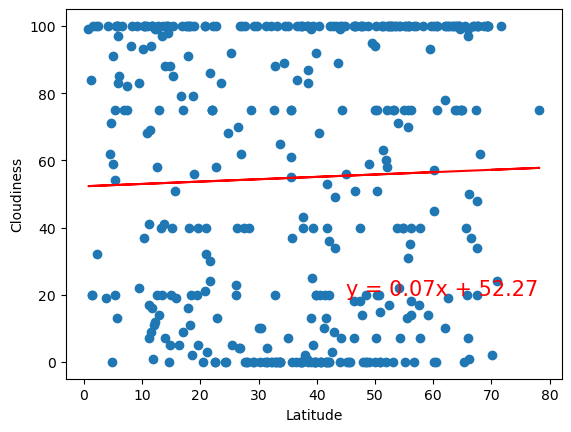

In [139]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (45, 20))

The r-Value is: -0.14488275949696525


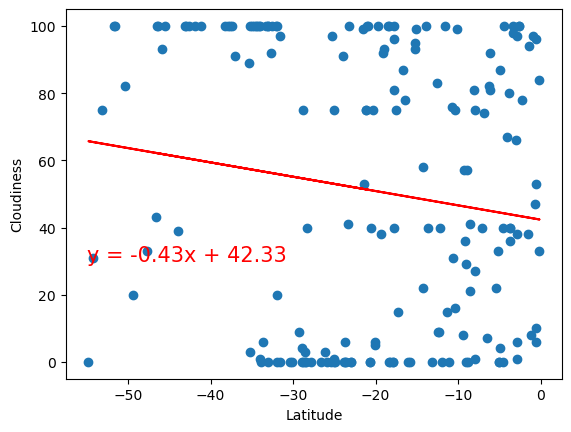

In [140]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", (-55, 30))

**Discussion about the linear relationship:** Both of these regression lines depict a positive linear association between latitude and cloudiness in both the Northern and Southern Hemispheres. Notably, the Southern Hemisphere's regression line exhibits a slightly stronger positive relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-Value is: 0.07464361426613553


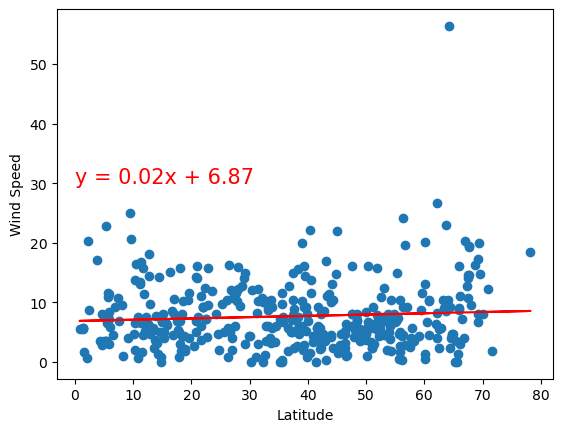

In [141]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (0, 30))

The r-Value is: -0.21256235498335166


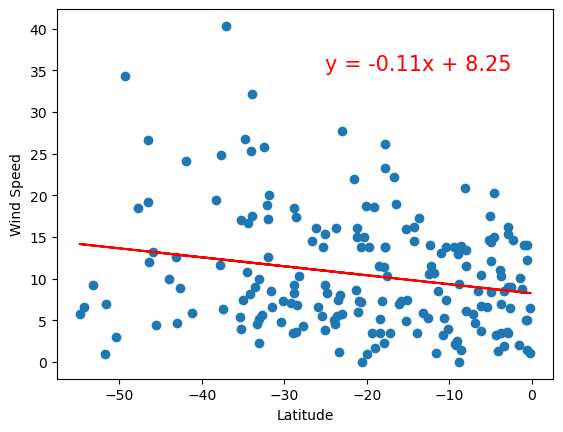

In [142]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", (-25, 35))

**Discussion about the linear relationship:** The regression line in the Northern Hemisphere illustrates a notably shallow positive linear association, whereas the regression line in the Southern Hemisphere portrays a more pronounced negative linear relationship.